In [28]:
# NLP Processing
# Processing by number of stars in the review

#  Following commands might be necessary to run NLTK:

#  pip install nltk
#  nltk.download('popular')


#  The first step is to read in the dataset.  
#  This data set contains 'ski resort reviews'
#  And the source is https://www.kaggle.com/datasets/fredkellner/onthesnow-ski-area-reviews

import pandas as pd
reviews = pd.read_csv ('OnTheSnow_SkiAreaReviews.csv')
#  give the dataset friendlier column names.
reviews.columns = ['placeholder','state','ski_area','reviewer_name','review_date',
                        'review_stars','review_text']

#  break up the dataset into 5 subsets by the number of stars in the review

reviews_1star = reviews[reviews['review_stars']==1]
reviews_2star = reviews[reviews['review_stars']==2]
reviews_3star = reviews[reviews['review_stars']==3]
reviews_4star = reviews[reviews['review_stars']==4]
reviews_5star = reviews[reviews['review_stars']==5]

Here is a distribution of the ratings:


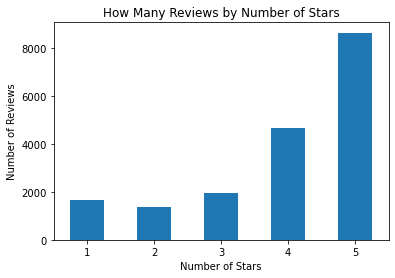

In [20]:
#  Lets make a bar chart of the number of reviews by the stars received.

#  import the necessary library to make the bar chart
from matplotlib import pyplot as plt

#  group by the stars and count the number of reviews
ski_areas_stars = reviews.groupby(['review_stars'])['review_stars'].count()

#  take the count data from above and create a bar chart
ax = ski_areas_stars.plot.bar(x='Number of Stars', y='Number of Reviews', rot=0)
plt.title("How Many Reviews by Number of Stars")
plt.xlabel("Number of Stars")
plt.ylabel("Number of Reviews")

print("Here is a distribution of the ratings:")

#  Most ski centers received good ratings.

In [30]:
#  This section cleans the reviews and creates a word list for each category of review
#  This section may take 5 minutes or more of running time to tokenize and clean the reviews.  

import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


#  This defines a function to pre-process the text by 
#  removing any numbers and punctuation.  It tokenizes the sentences into words. 
#  It also removes common stop words in the english language.  
#  Finally it lemmatizes the words to have only roots of the words not endings. 

def get_clean_review(df):
    clean_review = []
    for index, row in df.iterrows():
        review_str = str(row['review_text'])
        # split the string into a list of words
        tokens = word_tokenize(review_str)
        lower_tokens = [t.lower() for t in tokens]

        # removes anything not alpha characters such as punctuation and numbers
        alpha_only = [t for t in lower_tokens if t.isalpha()]

        # removes the stop words from the text
        no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

        # Lemmatize all tokens into a new list: lemmatized
        lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
        lemmatized = no_stops
        
        # make a list of lists
        for w in lemmatized:
            clean_review.append(w)
        
    return clean_review


#  The function returns a list of words broken down by the number of stars
#  There are 5 documents which will later be used in Gensim to do TFIDF analysis

print("Processing: 1 Star Reviews. There are",len(reviews_1star),"to process.")
review_for_dictionary1 = get_clean_review(reviews_1star)
print("Processing: 2 Star Reviews. There are",len(reviews_2star),"to process.")
review_for_dictionary2 = get_clean_review(reviews_2star)
print("Processing: 3 Star Reviews. There are",len(reviews_3star),"to process.")
review_for_dictionary3 = get_clean_review(reviews_3star)
print("Processing: 4 Star Reviews. There are",len(reviews_4star),"to process.")
review_for_dictionary4 = get_clean_review(reviews_4star)
print("Processing: 5 Star Reviews. There are",len(reviews_5star),"to process.")
review_for_dictionary5 = get_clean_review(reviews_5star)

#  Gensim requires the 5 documents to be in list forms.  Each document is a list 
#  of cleaned words.  The below line creates a list of lists.  

review_for_dictionary=[review_for_dictionary1,review_for_dictionary2,review_for_dictionary3,review_for_dictionary4,review_for_dictionary5]



Here is a distribution of the number of words in each review type:


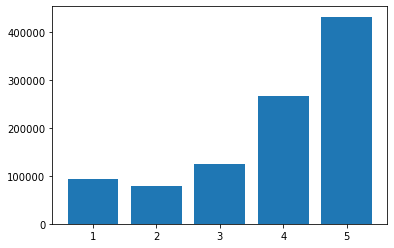

In [39]:
# frequencies from gensim
# pip install --upgrade gensim
from gensim.corpora.dictionary import Dictionary

#  import the necessary library to make the bar chart
from matplotlib import pyplot as plt


#  Create a dictionary of the number of words in each review stars to plot in bar chart
counter = 1
word_length_by_review = {}
print("Here is a distribution of the number of words in each review type:")
for r in review_for_dictionary:
    word_length_by_review[counter]=len(r)
    counter += 1 

# Make the bar chart from the dictionary of created above
keys = word_length_by_review.keys()
values = word_length_by_review.values()
plt.bar(keys, values)

   
#  Create a Dictionary    
dictionary = Dictionary(review_for_dictionary)

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(r) for r in review_for_dictionary]


In [34]:

from collections import defaultdict
import itertools

count =1 

print("\nHere are the lengths of the documents in the corpus\n")
for doc in corpus:
    print(count,"star revies have",len(doc),"words")
    count += 1

count = 1
for doc in  corpus:
    print("\nThese are the words in the ratings with", count, " star\n")
    count +=1
    # Sort the doc for frequency: bow_doc
    bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

    # Print the top 5 words of the document alongside the count
    for word_id, word_count in bow_doc[:5]:
        print(dictionary.get(word_id), word_count)

    # Create the defaultdict: total_word_count
    total_word_count = defaultdict(int)
    for word_id, word_count in itertools.chain.from_iterable(corpus):
        total_word_count[word_id] += word_count
    



Here are the lengths of the documents in the corpus

1 star revies have 8526 words
2 star revies have 7854 words
3 star revies have 10100 words
4 star revies have 14431 words
5 star revies have 17899 words

These are the words in the ratings with 1  star

ski 1211
mountain 1043
snow 943
great 918
lift 873

These are the words in the ratings with 2  star

ski 1058
mountain 875
great 824
snow 767
good 677

These are the words in the ratings with 3  star

ski 1685
mountain 1499
great 1335
snow 1168
good 1043

These are the words in the ratings with 4  star

great 3448
ski 3429
mountain 3088
snow 2786
good 2284

These are the words in the ratings with 5  star

ski 6516
great 6243
mountain 5208
snow 4325
skiing 3633


In [36]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
counter = 1
for doc in corpus:
    tfidf_weights = tfidf[doc]
    
    print('\n',counter,"Star Reviews key words are:\n")
    counter +=1
    
    # Sort the weights from highest to lowest: sorted_tfidf_weights
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

    # Print the top 5 weighted words
    for term_id, weight in sorted_tfidf_weights[:10]:
        print(dictionary.get(term_id), round(weight,3))



 1 Star Reviews key words are:

holliday 0.2
illness 0.105
sledders 0.105
jp 0.1
mc 0.1
der 0.09
es 0.088
thunderstruck 0.088
wandered 0.07
woodloch 0.07

 2 Star Reviews key words are:

mc 0.11
coperate 0.086
initiated 0.086
kelleys 0.086
majic 0.086
meh 0.086
sustainable 0.086
millions 0.073
blady 0.064
chump 0.064

 3 Star Reviews key words are:

song 0.095
division 0.094
filed 0.094
sanford 0.079
tuff 0.079
activated 0.063
cables 0.063
clyde 0.063
enuff 0.063
garlic 0.063

 4 Star Reviews key words are:

brule 0.096
clair 0.071
invoice 0.071
bleecker 0.062
comparisons 0.062
presentation 0.062
kaatskill 0.061
honeycomb 0.059
afton 0.055
hmsr 0.053

 5 Star Reviews key words are:

brule 0.331
josh 0.087
nub 0.078
monarch 0.07
saloon 0.065
homestead 0.056
peruvian 0.056
coolest 0.053
disappoints 0.05
blackjack 0.048


In [81]:
type(tfidf)

gensim.models.tfidfmodel.TfidfModel

In [63]:
r = reviews.loc[0,'review_text']
r != r

False

In [85]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np


def get_named_entity_list(df):
    ne = []
    for index, row in df.iterrows():
        review_str = str(row['review_text'])
        # Tokenize the article into sentences: sentences
        sentences = sent_tokenize(review_str)

        # Tokenize each sentence into words: token_sentences
        token_sentences = [word_tokenize(sent) for sent in sentences]

        # Tag each tokenized sentence into parts of speech: pos_sentences
        pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

        # Create the named entity chunks: chunked_sentences
        chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
        
        # Test for stems of the tree with 'NE' tags
        for sent in chunked_sentences:
            for chunk in sent:
                if hasattr(chunk, "label") and chunk.label() == "NE":
                    ne.append(chunk)
    return ne

ne_chunks = []             
ne_chunks.append(get_named_entity_list(reviews_1star))
ne_chunks.append(get_named_entity_list(reviews_2star))
ne_chunks.append(get_named_entity_list(reviews_3star))
ne_chunks.append(get_named_entity_list(reviews_4star))
ne_chunks.append(get_named_entity_list(reviews_5star))



In [81]:
print(type(ne_chunks))

print(ne_chunks[0][0:6])
print(ne_chunks[1][0:6])
print(ne_chunks[2][0:6])
print(ne_chunks[3][0:6])

<class 'list'>
[Tree('NE', [('Squaw', 'NNP')]), Tree('NE', [('Squaw', 'NNP')]), Tree('NE', [('Sugar', 'NNP'), ('Bowl', 'NNP')]), Tree('NE', [('Sugar', 'NNP'), ('Bowl', 'NNP')]), Tree('NE', [('Squaw', 'NNP')]), Tree('NE', [('Squaw', 'NNP')])]
[Tree('NE', [('Plenty', 'NN')]), Tree('NE', [('Skip', 'NNP'), ('Tahoe', 'NNP')]), Tree('NE', [('Utah', 'NNP')]), Tree('NE', [('Colorado', 'NNP')]), Tree('NE', [('Canadian', 'JJ'), ('Rockies', 'NNPS')]), Tree('NE', [('Tahoe', 'NNP')])]
[Tree('NE', [('Due', 'NNP')]), Tree('NE', [('Super', 'NNP')]), Tree('NE', [('WTF', 'NNP')]), Tree('NE', [('Large', 'JJ')]), Tree('NE', [('Squaw', 'NNP')]), Tree('NE', [('Solitude', 'NNP')])]
[Tree('NE', [('SV', 'NNP')]), Tree('NE', [('Squaw', 'NNP'), ('Valley', 'NNP')]), Tree('NE', [('Visibility', 'NN')]), Tree('NE', [('Great', 'NNP'), ('Expert', 'NNP'), ('Mountain', 'NNP')]), Tree('NE', [('Alpine', 'NNP'), ('Meadows', 'NNP')]), Tree('NE', [('Squaw', 'NNP'), ('Squaw', 'NNP'), ('Valley', 'NNP')])]


In [83]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(ne_chunks)

# Calculate the tfidf weights of doc: tfidf_weights
#counter = 1
#for doc in corpus:
tfidf_weights = tfidf[ne_chunks[0]]
    
#    print('\n',counter," Star Reviews key words are:")
#    counter +=1
    
    # Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

    # Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary.get(term_id), round(weight,3))


ValueError: not enough values to unpack (expected 2, got 1)